In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

## Графики доверительных интервалов

In [2]:
def get_confidence_intervals(get_one, sample, alpha, distr, lam):
    lower = np.zeros_like(sample)
    upper = np.zeros_like(sample)
    
    for i in xrange(sample.size):
        lower[i], upper[i] = get_one(sample[:i+1], alpha, distr, lam)
    
    return lower, upper

In [3]:
def plot_graphic(functions_get_one, names, title, colors, distr, sample, alpha, theta, lam, y_min, y_max):
    functions_get_one = np.array(functions_get_one)
    names = np.array(names)
    
    if(names.size != functions_get_one.size):
        return
    
    plt.figure(figsize=(16, 8))
    n = np.arange(0, sample.size, 1)
    plt.scatter(n, sample, alpha=0.2, s=20, label='sample')
    plt.plot(n, theta * np.ones_like(n), color='red', linewidth=0.5, label='parametr')
    
    for i in xrange(functions_get_one.size):
        lower, upper = get_confidence_intervals(functions_get_one[i], sample, alpha, distr, lam)
        
        # заполняет пространство между двумя функциями
        plt.fill_between(n, upper, lower, color=colors[i], alpha=0.3, label=str(names[i]))
        
    #plt.xlim((1, 200))  # размеры графика по горизонтальной оси (ставим None, если по стороне ограничений нет)
    plt.ylim((y_min, y_max))  # размеры графика по вертикальной оси 
    plt.xlabel('$n$')  # название горизонтальной оси (аналогично plt.ylabel)
    plt.title(str(title))  # имя графика
    plt.grid()  # добавляем сетку
    plt.legend()
    plt.show()

In [4]:
def probability(get_one, title, distr, first, second, amount_of_sample, alpha, theta, lam, y_min, y_max):
    prob_first = np.ones(amount_of_sample)
    prob_second = np.ones(amount_of_sample)
    
    amount_for_first = 0
    amount_for_second = 0
    
    for i in xrange(amount_of_sample):
        sample = distr.rvs(size=second)
        
        beg_first, end_first = get_one(sample[:first+1], alpha, distr, lam)
        
        if((beg_first <= theta) & (theta <= end_first)):
            amount_for_first += 1
            
        beg_second, end_second = get_one(sample[:second+1], alpha, distr, lam)
        if((beg_second <= theta) & (theta <= end_second)):
            amount_for_second += 1
            
        prob_first[i] = float(amount_for_first)/(i + 1)
        prob_second[i] = float(amount_for_second)/(i + 1)

    plt.figure(figsize=(10, 5))
    n = np.arange(0, amount_of_sample, 1)
    
    plt.plot(n, prob_first, label='$n = ' + str(first) + '$')
    plt.plot(n, prob_second, label='$n = ' + str(second) + '$')

    plt.ylim((y_min, y_max))  # размеры графика по вертикальной оси 
    plt.xlabel('$n$')  # название горизонтальной оси (аналогично plt.ylabel)
    plt.title(str(title))  # имя графика
    plt.grid()  # добавляем сетку
    plt.legend()
    plt.show()

In [5]:
N = 100
theta = 1
lam = 1
alpha = 0.95
gamma = 1 - alpha
first = 10
second = 100
amount_of_sample = 1000

## $R[0,\theta]$

In [6]:
uniform = sts.uniform(loc=0, scale=theta)
sample_uniform = uniform.rvs(size=N)

### ДИ: $(\frac{\overline{X}}{0.5 + \sqrt{\frac{1}{12\gamma n}}}, \frac{\overline{X}}{0.5 - \sqrt{\frac{1}{12\gamma n}}})$

In [7]:
def get_one_uniform_mean(sample, alpha, distr, lam):
    gamma = 1 - alpha
    mean = float(np.mean(sample))
    e = np.sqrt(1./(12*gamma*sample.size))
    return mean/(0.5 + e), mean/(0.5 - e)

### Вероятность для n = 10 и n = 100

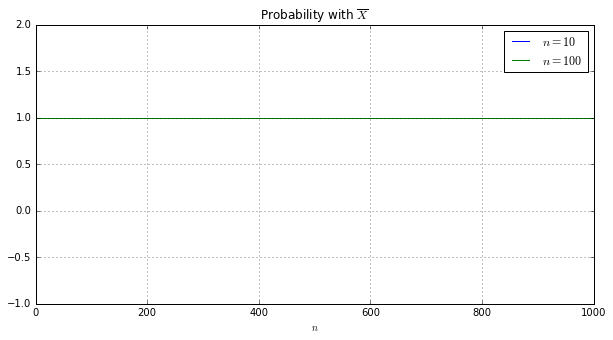

In [8]:
probability(get_one_uniform_mean, 'Probability with $\\overline{X}$', uniform, first, second, \
            amount_of_sample, alpha, theta, lam, -1, 2)

### ДИ: $(X_{(1)}, \frac{X_{(1)}}{1 - \sqrt[n]{\alpha}})$

In [9]:
def get_one_uniform_min(sample, alpha, distr, lam):
    min_el = float(min(sample))
    return min_el, min_el/(1. - np.power(alpha, 1.0/sample.size))

### Вероятность для n = 10 и n = 100

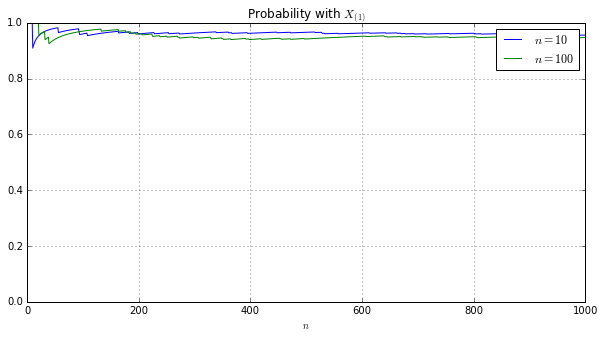

In [10]:
probability(get_one_uniform_min, 'Probability with $X_{(1)}$', uniform, first, second, \
            amount_of_sample, alpha, theta, lam, 0, 1)

### ДИ: $(X_{(n)}, \frac{X_{(n)}}{\sqrt[n]{1 - \alpha}})$

In [11]:
def get_one_uniform_max(sample, alpha, distr, lam):
    max_el = float(max(sample))
    return max_el, max_el/np.power(1. - alpha, 1.0/sample.size)

### Вероятность для n = 10 и n = 100

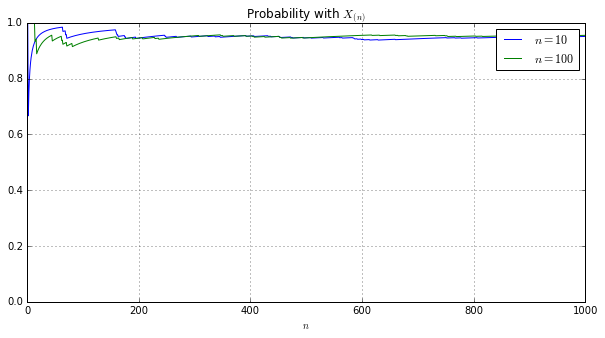

In [12]:
probability(get_one_uniform_max, 'Probability with $X_{(n)}$', uniform, first, second, \
            amount_of_sample, alpha, theta, lam, 0, 1)

### Графики доверительных интервалов

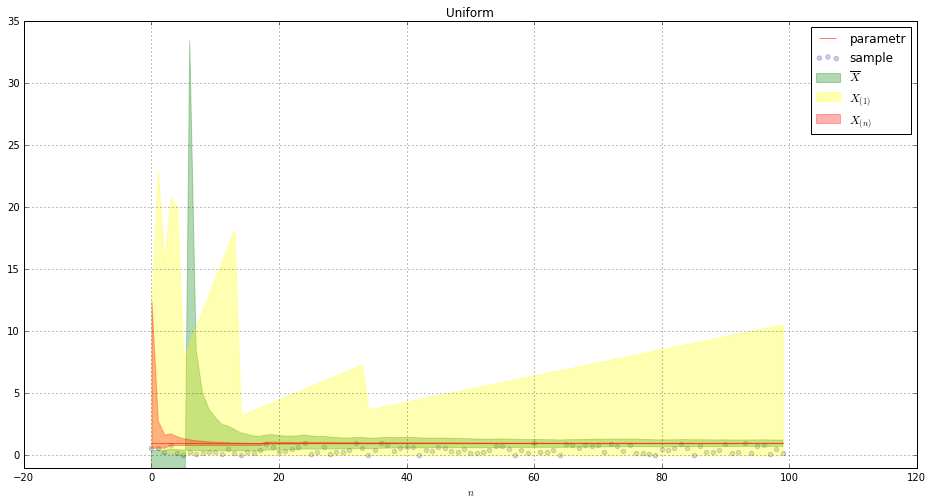

In [13]:
functions = np.array([get_one_uniform_mean, get_one_uniform_min, get_one_uniform_max])
colors = np.array(['green', 'yellow', 'red'])
names = np.array(['$\overline{X}$', '$X_{(1)}$', '$X_{(n)}$'])
distr = sts.uniform(loc=0, scale=theta)
plot_graphic(functions, names, 'Uniform', colors, distr, sample_uniform, alpha, theta, lam, -1, 35)

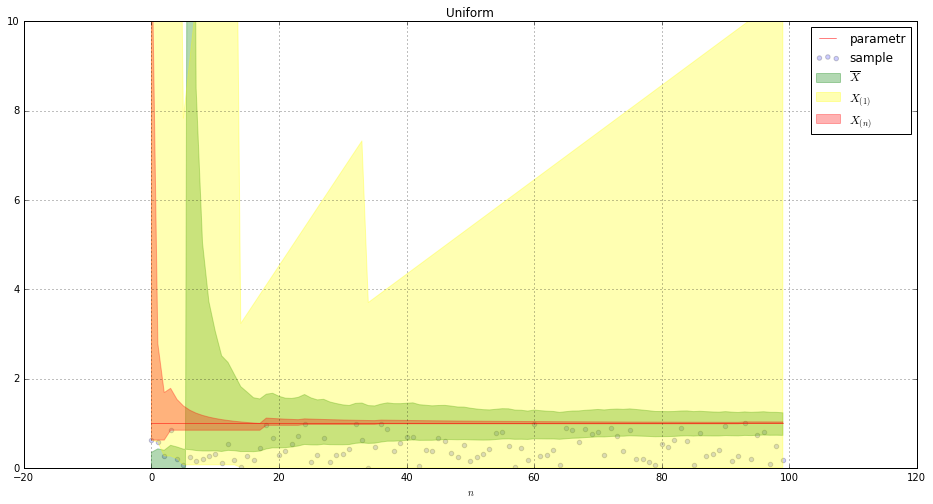

In [14]:
plot_graphic(functions, names, 'Uniform', colors, distr, sample_uniform, alpha, theta, lam, 0, 10)

### Вывод

Наилучший ДИ получается при использовании $x_{(n)}$

## $Cauchy$ со сдвигом $p_{\theta}(x) = \frac{1}{\Pi (1 + {(x - \theta)}^{2})}$

In [15]:
cauchy = sts.cauchy(loc=theta)
sample_cauchy = cauchy.rvs(size=N)

### ДИ: $(\hat{\mu} - u_{\frac{1 + \alpha}{2}}\cdot\frac{\pi}{2\sqrt{n}}, \hat{\mu} + u_{\frac{1 + \alpha}{2}}\cdot\frac{\pi}{2\sqrt{n}})$, где $u_{\frac{1 + \alpha}{2}}$ - $\frac{1 + \alpha}{2}$ - квантиль $N(0, \frac{\pi^{2}}{4})$.

In [16]:
def get_one_cauchy(sample, alpha, distr, lam):
    quantile = distr.ppf((1. + alpha)/2)
    median = np.median(sample)
    k = quantile * np.pi/(2*np.sqrt(sample.size))
    return median - k, median + k

### Вероятность для n = 10 и n = 100

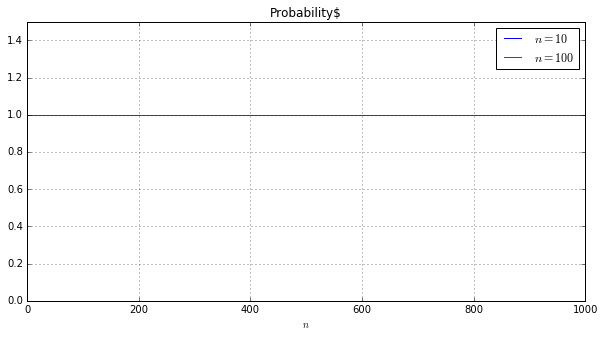

In [17]:
probability(get_one_cauchy, 'Probability$', cauchy, first, second, \
            amount_of_sample, alpha, theta, lam, 0, 1.5)

### График доверительного интервала

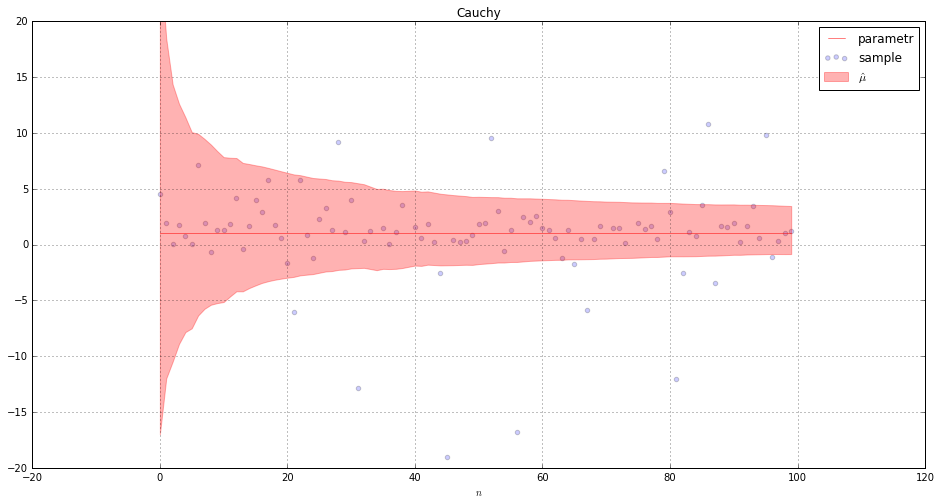

In [18]:
functions = np.array([get_one_cauchy])
colors = np.array(['red'])
names = np.array(['$\\hat{\\mu}$'])
plot_graphic(functions, names, 'Cauchy', colors, cauchy, sample_cauchy, alpha, theta, lam, -20, 20)

## $Pois(\theta)$

In [19]:
pois = sts.poisson(theta)
sample_pois = pois.rvs(size=N)

### ДИ: $(\overline{X} - u_{\frac{1 + \alpha}{2}}\cdot\sqrt{\frac{\overline{X}}{n}}, \overline{X} + u_{\frac{1 + \alpha}{2}}\cdot\sqrt{\frac{\overline{X}}{n}})$, где $u_{\frac{1 + \alpha}{2}}$ - $\frac{1 + \alpha}{2}$ - квантиль $N(0, 1)$.

In [20]:
def get_one_pois(sample, alpha, distr, lam):
    quantile = distr.ppf((1. + alpha)/2)
    mean = np.mean(sample)
    k = quantile * np.sqrt(float(mean)/np.sqrt(sample.size))
    return mean - k, mean + k

### Вероятность для n = 10 и n = 100

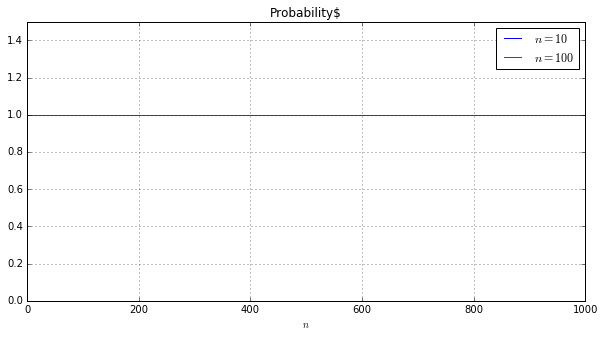

In [21]:
probability(get_one_pois, 'Probability$', pois, first, second, \
            amount_of_sample, alpha, theta, lam, 0, 1.5)

### График доверительного интервала

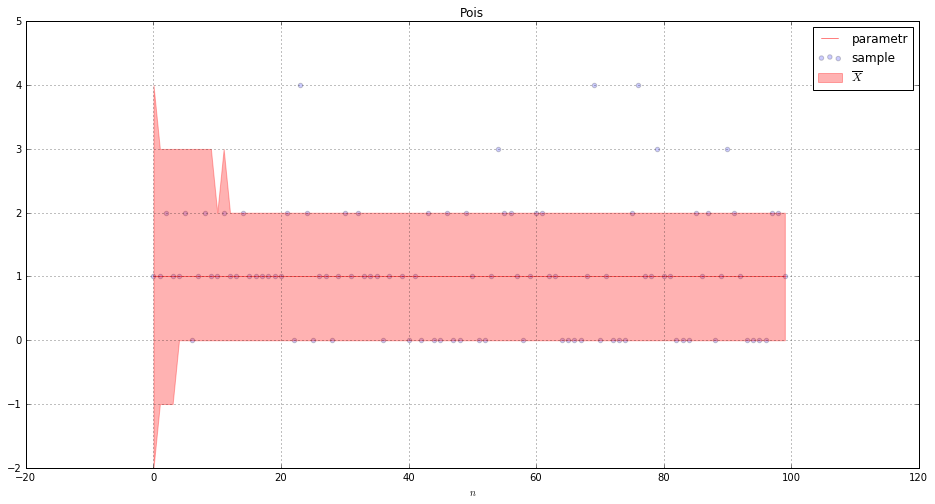

In [22]:
functions = np.array([get_one_pois])
colors = np.array(['red'])
names = np.array(['$\\overline{X}$'])
plot_graphic(functions, names, 'Pois', colors, pois, sample_pois, alpha, theta, lam, -2, 5)

## $Г(\theta, \lambda)$

In [23]:
theta = 10
lam = 1

In [24]:
gamma = sts.gamma(theta)
sample_gamma = gamma.rvs(size=N)

### ДИ: $(\overline{X} - u_{\frac{1 + \alpha}{2}}\cdot\sqrt{\frac{\overline{X}}{\lambda n}}, \overline{X} + u_{\frac{1 + \alpha}{2}}\cdot\sqrt{\frac{\overline{X}}{\lambda n}})$, где $u_{\frac{1 + \alpha}{2}}$ - $\frac{1 + \alpha}{2}$ - квантиль $N(0, 1)$.

In [25]:
def get_one_gamma_with_lambda(sample, alpha, distr, lam):
    quantile = distr.ppf((1. + alpha)/2)
    mean = np.mean(sample)
    k = quantile * np.sqrt(float(mean)/(np.sqrt(sample.size)) * lam)
    return mean - k, mean + k

### Вероятность для n = 10 и n = 100

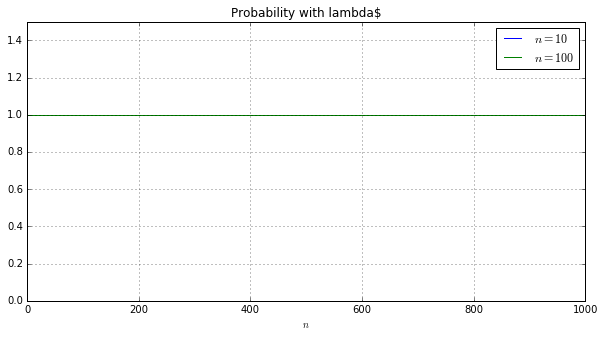

In [26]:
probability(get_one_gamma_with_lambda, 'Probability with lambda$', gamma, first, second, \
            amount_of_sample, alpha, theta, lam, 0, 1.5)

### График доверительного интервала

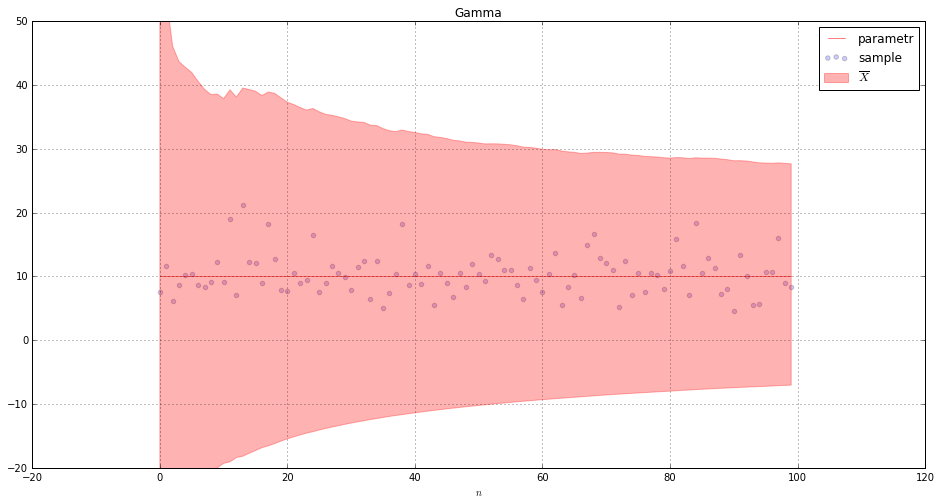

In [27]:
functions = np.array([get_one_gamma_with_lambda])
colors = np.array(['red'])
names = np.array(['$\\overline{X}$'])
plot_graphic(functions, names, 'Gamma', colors, gamma, sample_gamma, alpha, theta, lam, -20, 50)